# Bootstrap confidence intervals


## Generating bootstrap replicates

We need to think probabilistically to say something general.

### Visualizing bootstrap samples

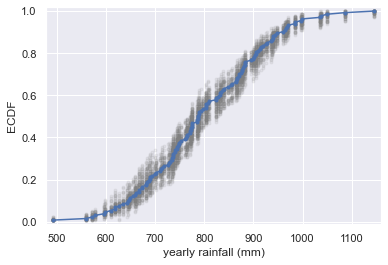

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5, 878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1, 752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,572.4, 1146.4,  728.2,  864.2,  793. ])

for _ in range(50):
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker=".", linestyle="none", color="gray", alpha=0.1)
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker=".")
plt.margins(0.02)
_ = plt.xlabel("yearly rainfall (mm)")
_ = plt.ylabel("ECDF")
plt.show()

Bootstrap samples give an idea of how the distribution of rainfalls is spread.

### Generating many bootstrap replicates

In [9]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

### Bootstrap replicates of the mean and the SEM

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. 
The standard deviation of this mean distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points.

10.510549150506188
10.544940082764636


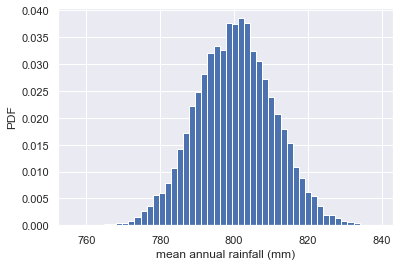

In [10]:
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

bs_std = np.std(bs_replicates)
print(bs_std)
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel("mean annual rainfall (mm)")
plt.ylabel("PDF")
plt.show()

The SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is normal.

### Confidence intervals of rainfall data

Confidence intervals quantify uncertainty about the parameter estimates.

In [11]:
np.percentile(bs_replicates, [2.5 , 97.5])

array([779.47684211, 821.11881579])

95% confidence interval. That is the 2.5th and 97.5th percentile

### Bootstrap replicates of other statistics

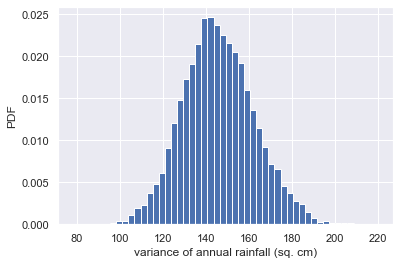

In [12]:
bs_replicate = draw_bs_reps(rainfall, np.var, 10000)
bs_replicate = bs_replicate / 100
plt.hist(bs_replicate, bins=50, density=True)
plt.xlabel('variance of annual rainfall (sq. cm)')
plt.ylabel('PDF')
plt.show()

This is not normally distributed, as it has a longer tail to the right. 

### Confidence interval on the rate of no-hitters

95% confidence interval = [661.87639442 870.13715139] games


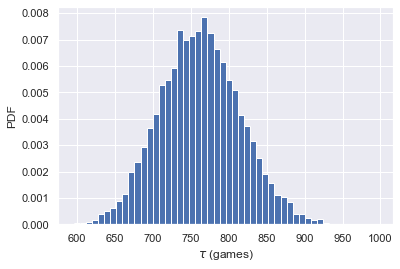

In [13]:
import pickle
f = open("nohitter_times.dat", "rb")
nohitter_times = pickle.load(f)
nohitter_times = nohitter_times.astype("int")
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'games')
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel(r"$\tau$ (games)")
plt.ylabel("PDF")
plt.show()

This gives an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

## Pairs bootstrap

The computed bootstrap confidence intervals on summary statistics is done nonparameterically. But doing linear squares regression a linear model is used and it is a parametric estimate.
Parameters are likely to change upon repeated measurements so we need to think probabilistically.

### A function to do pairs bootstrap


In [14]:
def draw_bs_pairs_linreg(x, y, size=1):
    inds = np.arange(0, len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    return bs_slope_reps, bs_intercept_reps

### Pairs bootstrap of literacy/fertility data


[0.04413026 0.05557729]


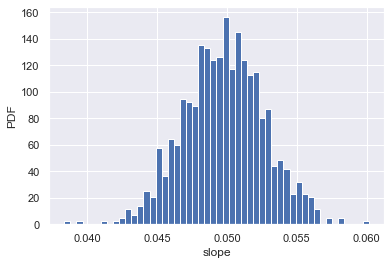

In [17]:
import pandas as pd
literacy_fertility = pd.read_csv("illiteracy.csv")
literacy_fertility["illiteracy"] = 100 - literacy_fertility["female literacy"]
illiteracy = literacy_fertility["illiteracy"]
fertility = literacy_fertility["fertility"]

bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)
print(np.percentile(bs_slope_reps, [2.5, 97.5]))
plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel("slope")
plt.ylabel("PDF")
plt.show()

### Plotting bootstrap regressions

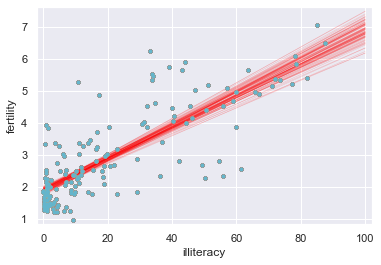

In [46]:
x = np.array([0, 100])
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color="red")
    _ = plt.plot(illiteracy, fertility, marker=".", linestyle="none")
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

Estimation of the parameters can be done by using the 95% confidence inteval.